# View IR images of a film
=======================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date   : May 31th 2017

In [54]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [55]:
print theNotebook

TimeSeqIRImages


In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os
from matplotlib.colors import LogNorm

In [57]:
from matplotlib.backends.backend_pdf import PdfPages

In [58]:
from scipy import stats  
from scipy import ndimage
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal

In [59]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [60]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [61]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

In [62]:
from PIL import Image

In [63]:
movies=['film_2h00.mov','film_2h25.mov','film_3h36.mov']

In [64]:
SelectTagRe='^image([0-9]+).tiff$' # regular expression to select the file
SearchTagRe='^image[0-9]+.tiff$'
MIN_IMGNUMBER=0
MAX_IMGNUMBER=9999
NBIMGPERLROW=4
SEL=0

In [65]:
NBMOVIES=len(movies)

In [66]:
input_dirs = [ mv.split('.')[0]  for mv in movies]

In [67]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

## Function definition

In [72]:
def MakeFileList(dir_img):
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    
    indexes_files= [] # global list
    filelist_tiffimages= []  # global list
    
    count=0
    
    listfiles=os.listdir(dir_img) 
    for filename in listfiles:
        if re.search(SearchTagRe,filename):  #example of filename filter
            str_index=re.findall(SelectTagRe,filename)
            count=count+1
            index=int(str_index[0])
            if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                indexes_files.append(index)         
                shortfilename=dir_img+'/'+filename
                filelist_tiffimages.append(shortfilename)
                    
    return indexes_files, filelist_tiffimages 

In [83]:
def GetListOfFiles(dir_img):
    """
    
    Get ordered files 
    """
    indexes_files, filelist_tiffimages  = MakeFileList(inputdir)   # Make the list
    
    indexes_files=np.array(indexes_files)
    filelist_tiffimages=np.array(filelist_tiffimages)
    
    sorted_indexes=np.argsort(indexes_files) # sort the file indexes
    sorted_numbers=indexes_files[sorted_indexes]
    sorted_files=filelist_tiffimages[sorted_indexes]
    
    sorted_filenames=[]
    for file in sorted_files:
        #fullfilename=os.path.join(inputdir,file)
        fullfilename=file
        sorted_filenames.append(fullfilename)
        
    sorted_filenames=np.copy(sorted_files)
    
    return sorted_filenames

In [84]:
#sorted_filenames=GetListOfFiles(inputdir)

## Extract Mean and RMS

In [85]:
def GetMeanAndRMSFromHistos(sorted_filenames):
    """
    GetMeanAndRMSFromHistos
    ==============
    """
    #global all_images
    #global all_titles
    #global object_name

    all_mean = []
    all_rms = []
    
    NBIMAGES=len(sorted_filenames)
    
    for index in np.arange(0,NBIMAGES):
        
        img = Image.open(sorted_filenames[index])
        iar_shp = np.array(img).shape
        iarr = np.array(img.getdata()).reshape(iar_shp[0], iar_shp[1])
        iarr_flat=iarr.flatten()
        iarr_cut=iarr_flat[np.where(iarr_flat>=1)]
        stat_mean=iarr_cut.mean()
        stat_rms=iarr_cut.std()
        
        all_mean.append(stat_mean)
        all_rms.append(stat_rms)
        
        
    return  all_mean, all_rms

In [ ]:
#figfilename='cloudhisto2_'+object_name+'.pdf'

Compute mean and RMS

In [86]:
allh_mean = [] 
allh_rms = [] 


for inputdir in input_dirs:
    sorted_filenames=GetListOfFiles(inputdir)
    all_mean, all_rms= GetMeanAndRMSFromHistos(sorted_filenames)
    
    allh_mean.append(all_mean)
    allh_rms.append(all_rms)


## Plot

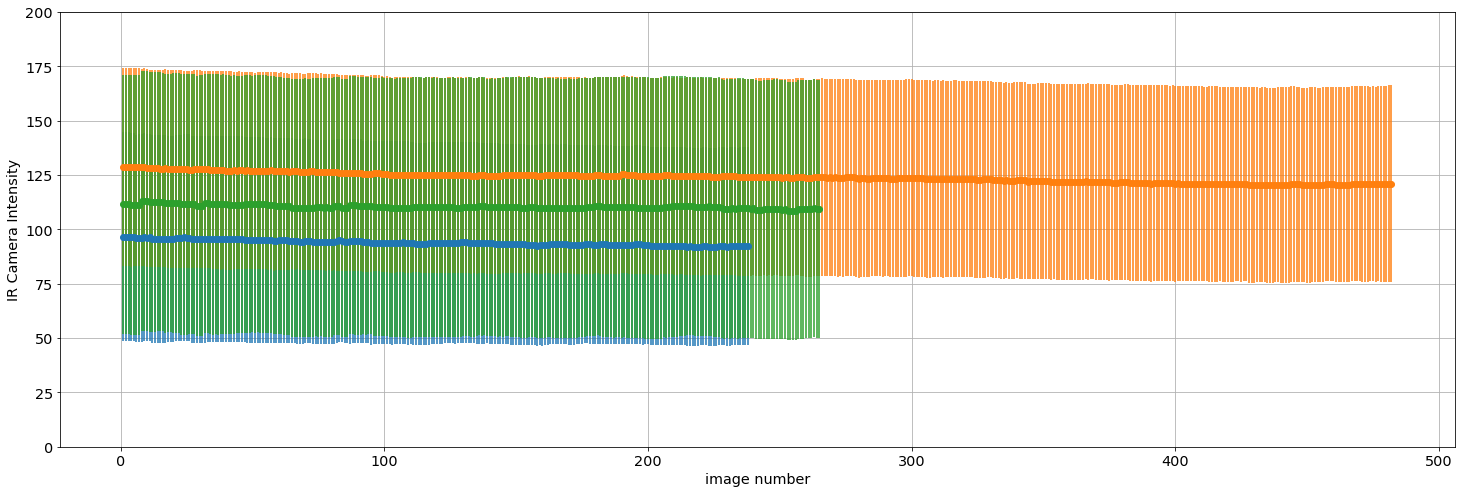

In [89]:
plt.figure(figsize=(25,8))

for index in range(len(allh_mean)):
    mean=allh_mean[index]
    rms=allh_rms[index] 

    plt.errorbar(range(1,len(mean)+1),mean,yerr=rms, fmt='o')

plt.ylim(0,200)
plt.xlabel('image number')
plt.ylabel('IR Camera Intensity')
plt.grid()
#allh_rms

In [ ]:
plt.plot(allh_rms)